<a href="https://colab.research.google.com/github/taimoorsardar/Machine-Learning-Projects/blob/main/ChurnClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#Data Cleaning and Preprocessing

to get the dataset you can download from the link: [Churn Dataset](https://www.kaggle.com/datasets/barun2104/telecom-churn)

please upload the downlaoded csv file into colab notebook

In [ ]:
file_path = '/content/churn-bigml-80.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column before handling:\n", missing_values)

Missing values per column before handling:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [ ]:
# Address missing values
# Fill missing numerical values with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [ ]:
# Fill missing categorical values with the mode
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
# Checking unique values for 'State', 'International plan', and 'Voice mail plan'
print("Unique values in 'State':", data['State'].nunique())
print("Unique values in 'International plan':", data['International plan'].nunique())
print("Unique values in 'Voice mail plan':", data['Voice mail plan'].nunique())

Unique values in 'State': 51
Unique values in 'International plan': 2
Unique values in 'Voice mail plan': 2


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()
data_encoded = data.copy()
# Apply label encoding to 'State'
data_encoded['State'] = label_encoder.fit_transform(data['State'])

# Apply label encoding to 'International plan' and 'Voice mail plan'
data_encoded['International plan'] = label_encoder.fit_transform(data['International plan'])
data_encoded['Voice mail plan'] = label_encoder.fit_transform(data['Voice mail plan'])

# Display the first few rows to confirm the encoding
data_encoded.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Check for duplicates
duplicates = data_encoded.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-a994535b6d66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='viridis')


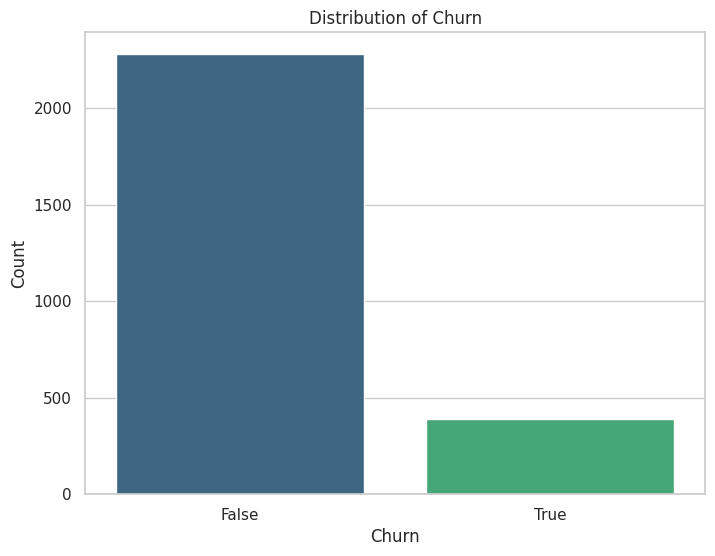

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of the target variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [ ]:
# Display the counts of each class
churn_counts = data['Churn'].value_counts()
print("Churn distribution:\n", churn_counts)

Churn distribution:
 Churn
False    2278
True      388
Name: count, dtype: int64


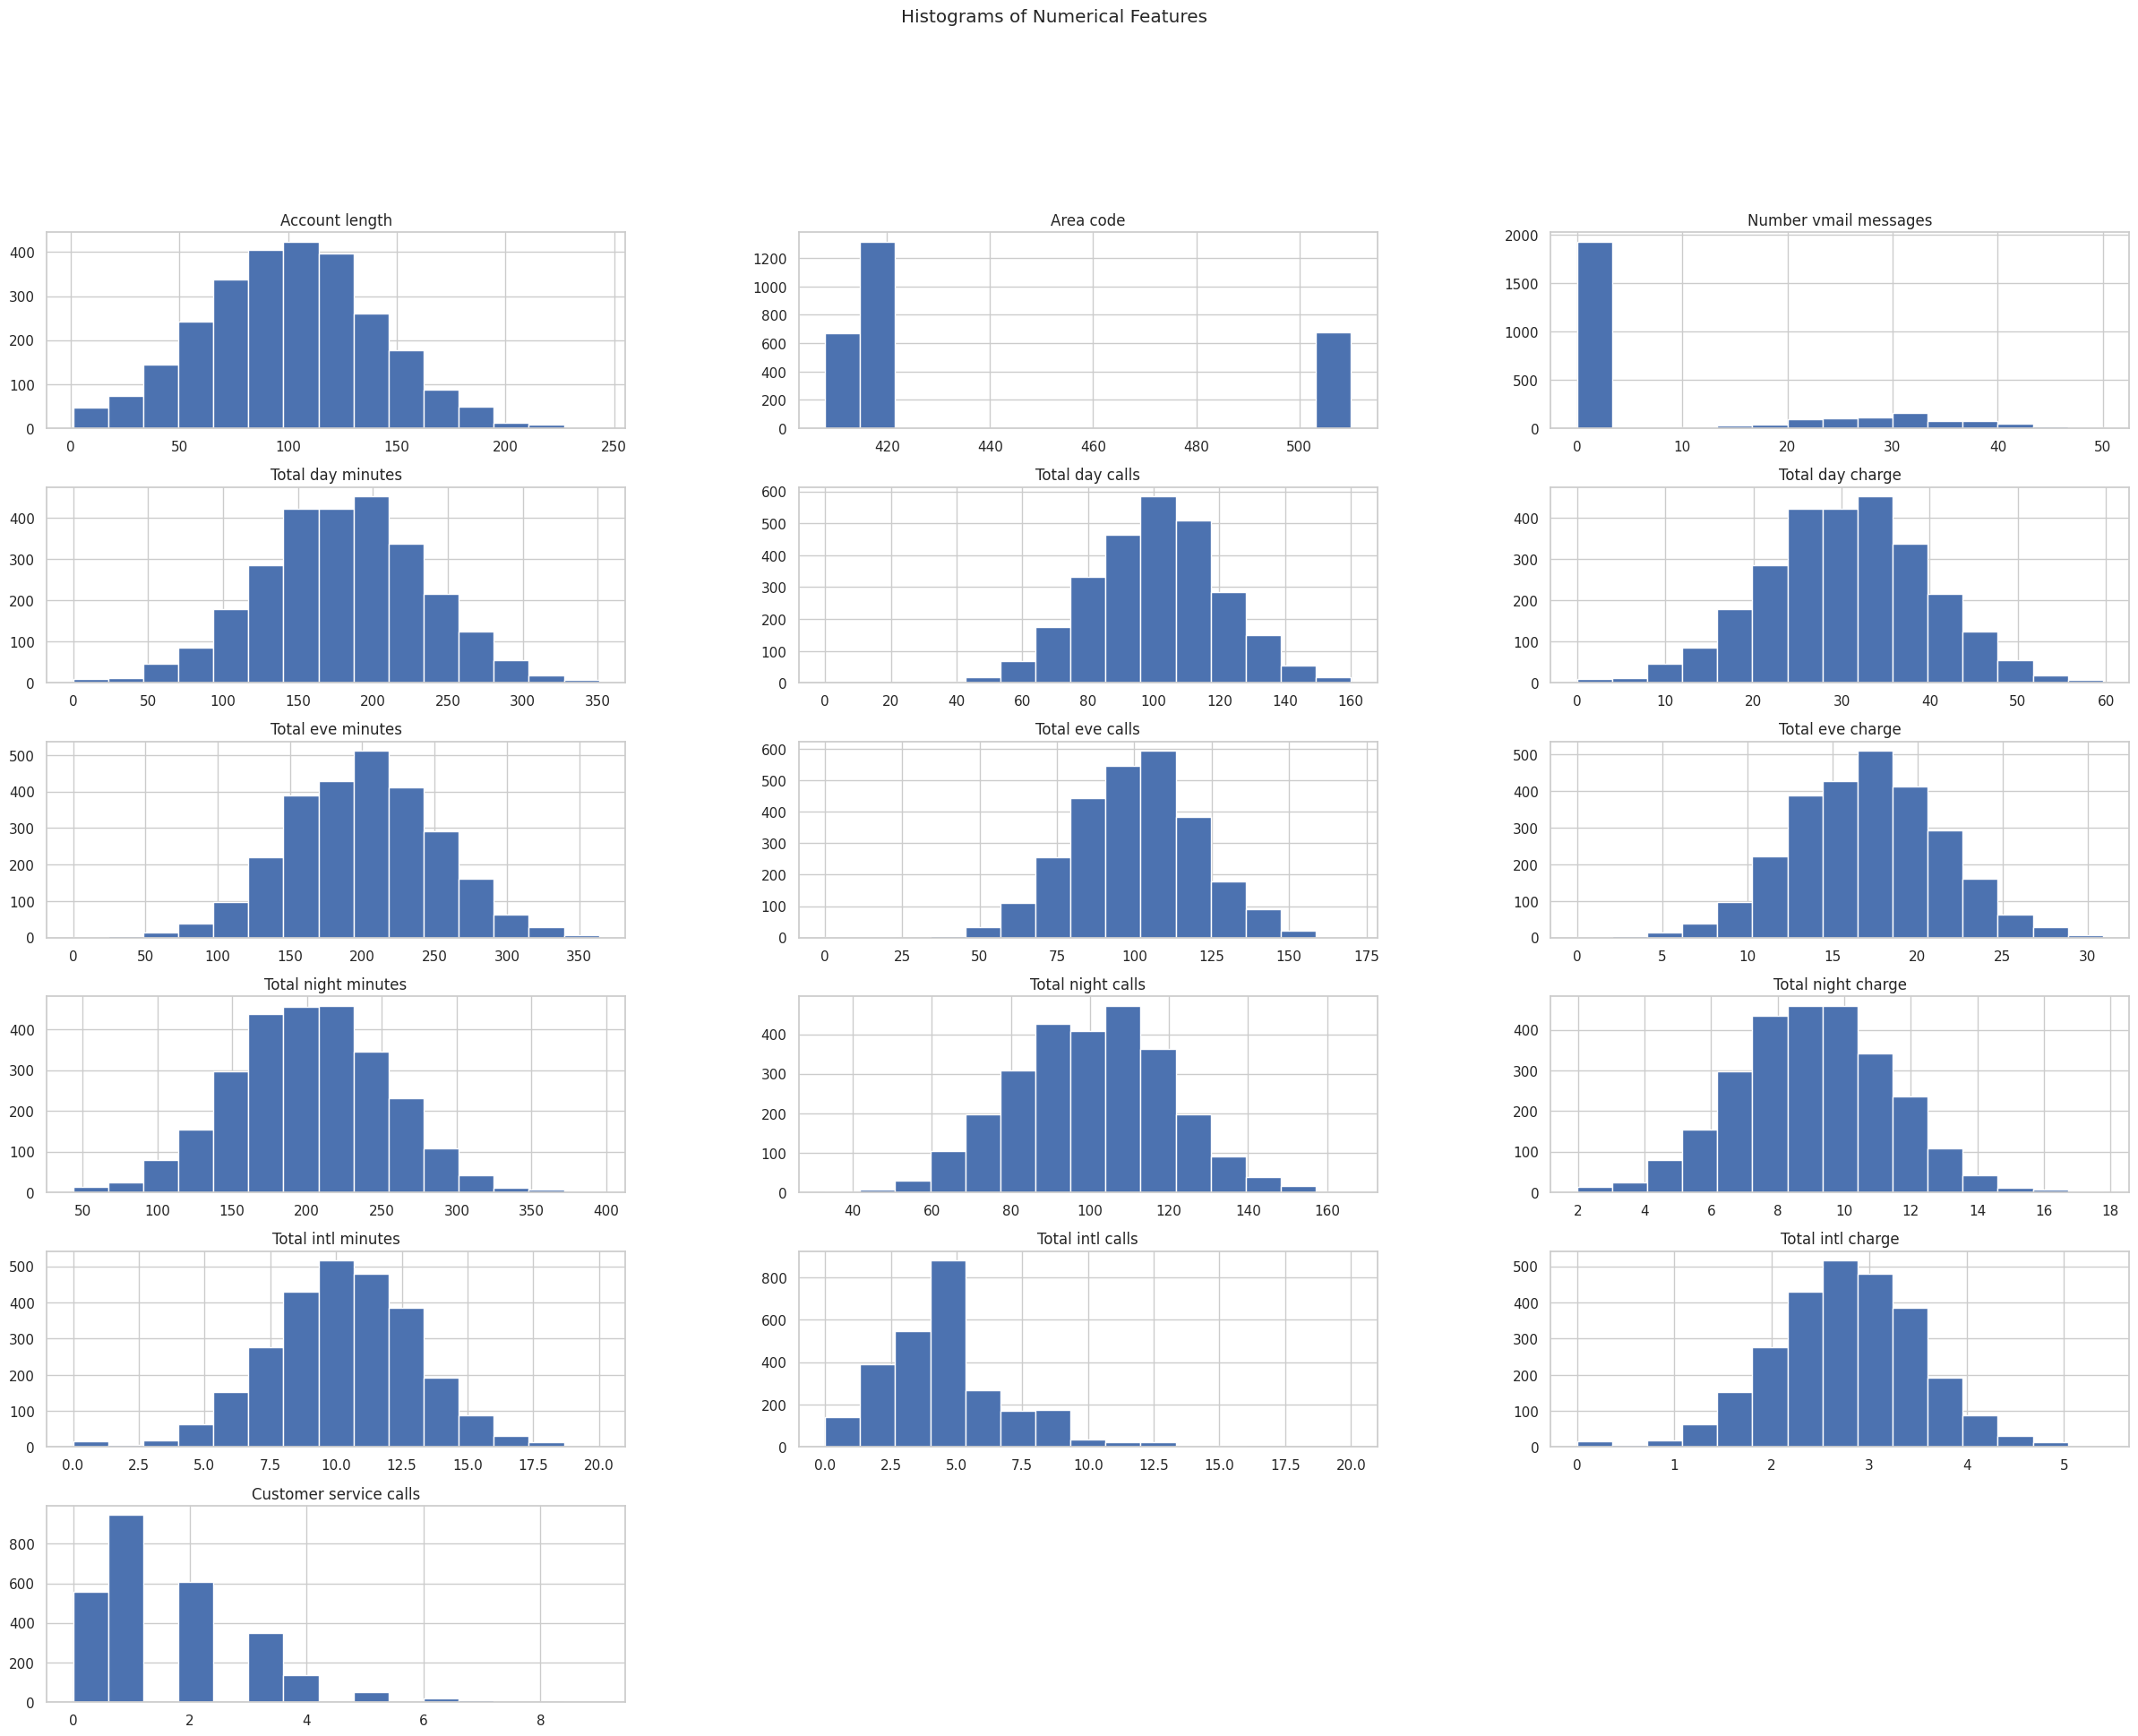

In [ ]:
# 2. Distribution of numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
data[numerical_cols].hist(bins=15, figsize=(30, 25), layout=(7, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

<ipython-input-19-9241e98b8fd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=data, palette='viridis')
<ipython-input-19-9241e98b8fd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=data, palette='viridis')
<ipython-input-19-9241e98b8fd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=data, palette='viridis')
<ipython-input-19-9241e98b8fd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

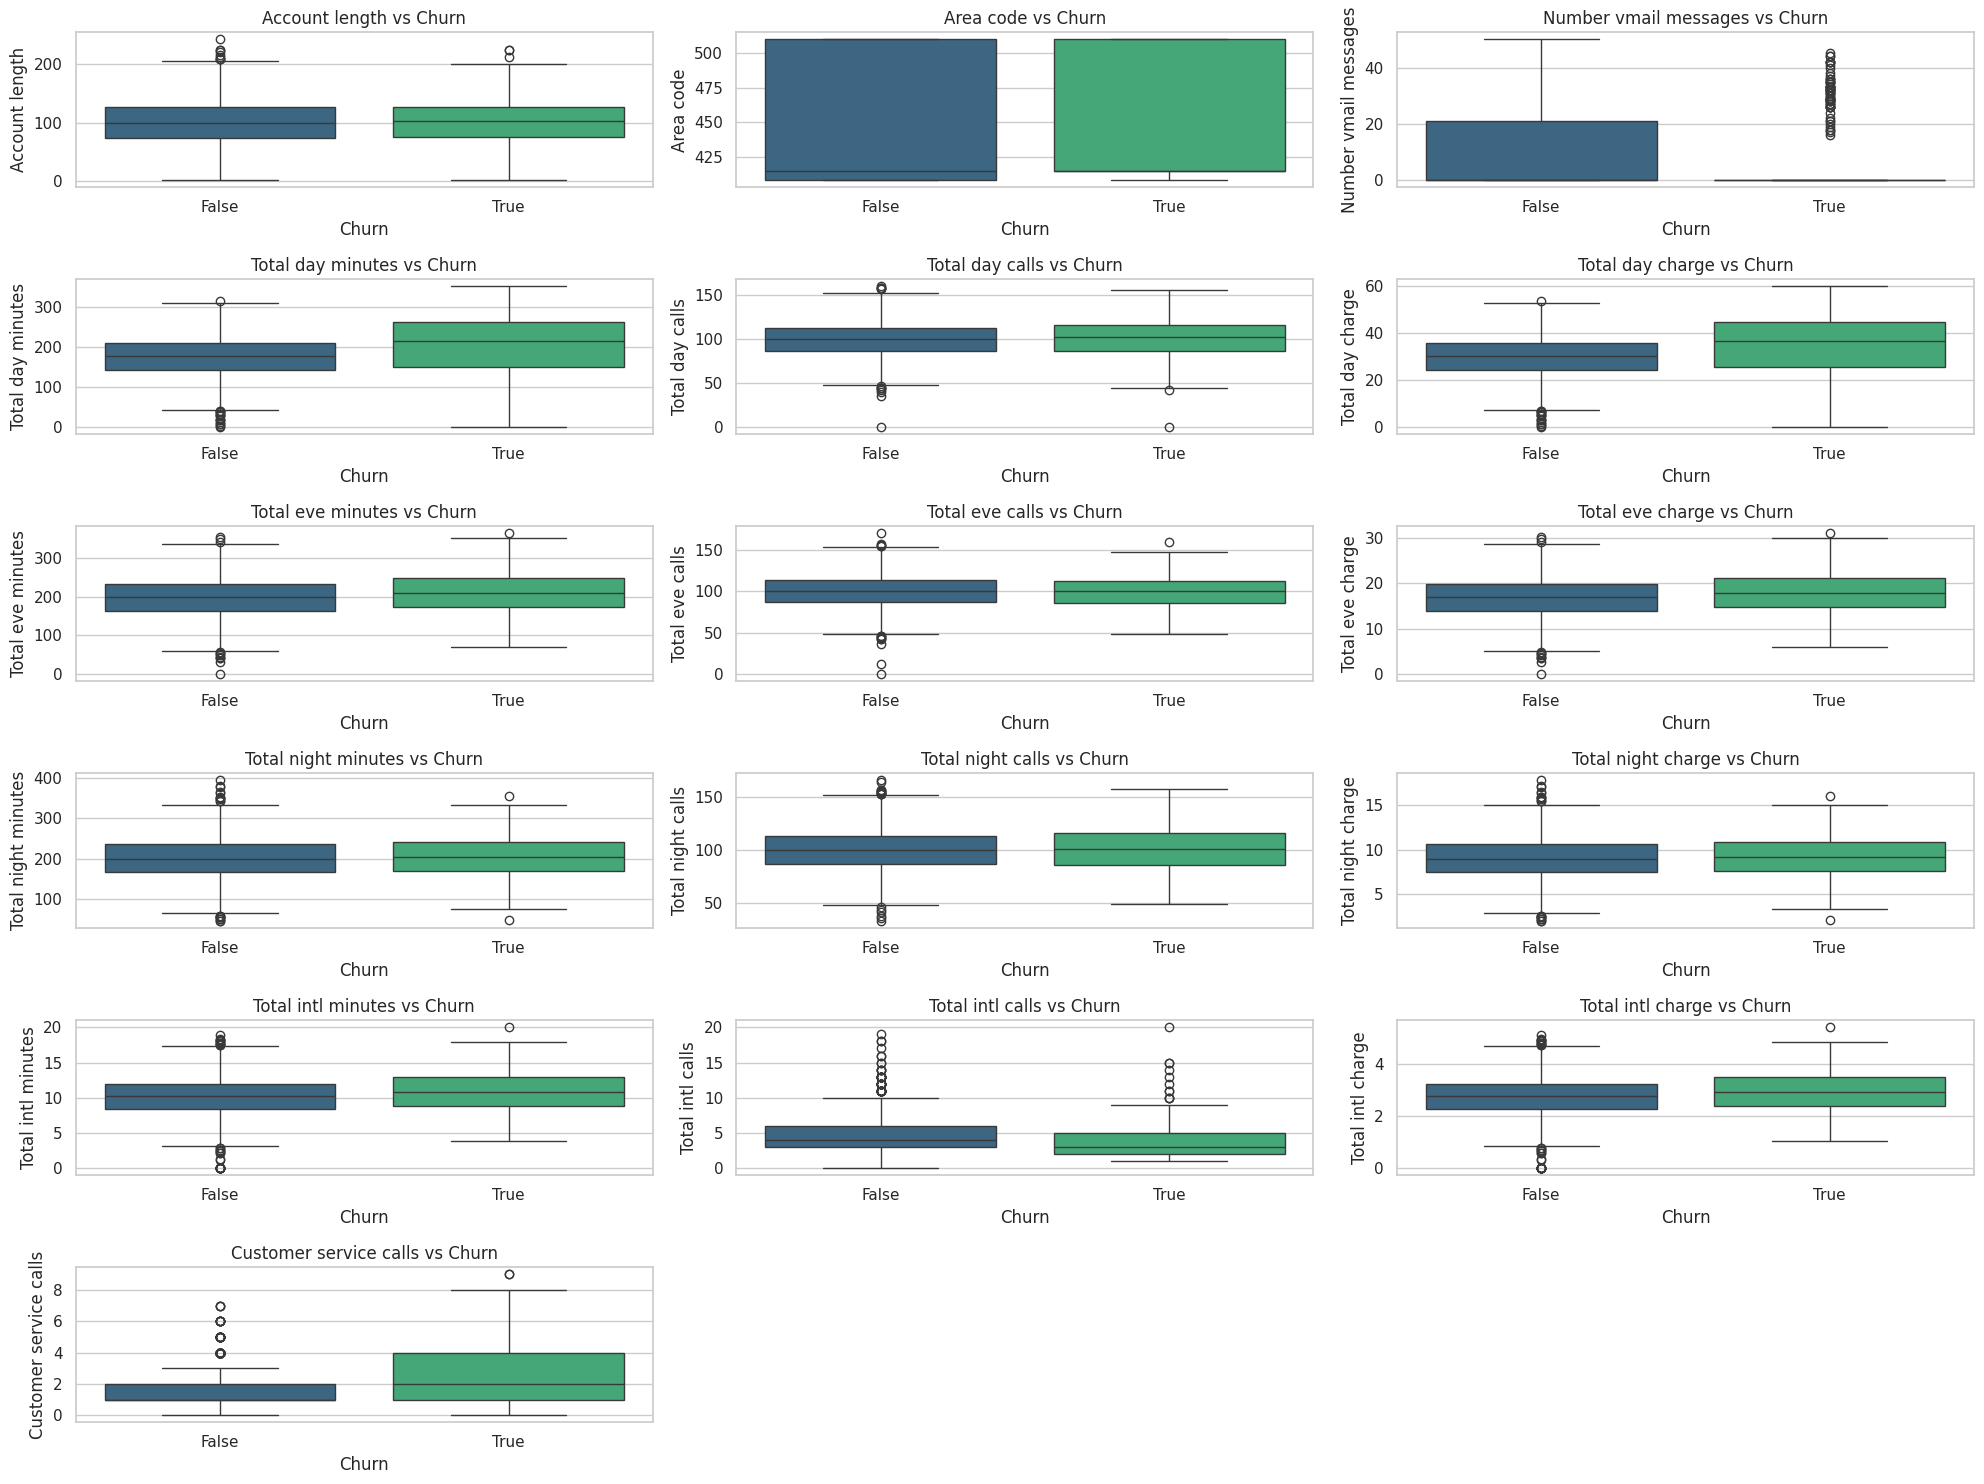

In [ ]:
# 3. Relationship between numerical features and Churn
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=data, palette='viridis')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

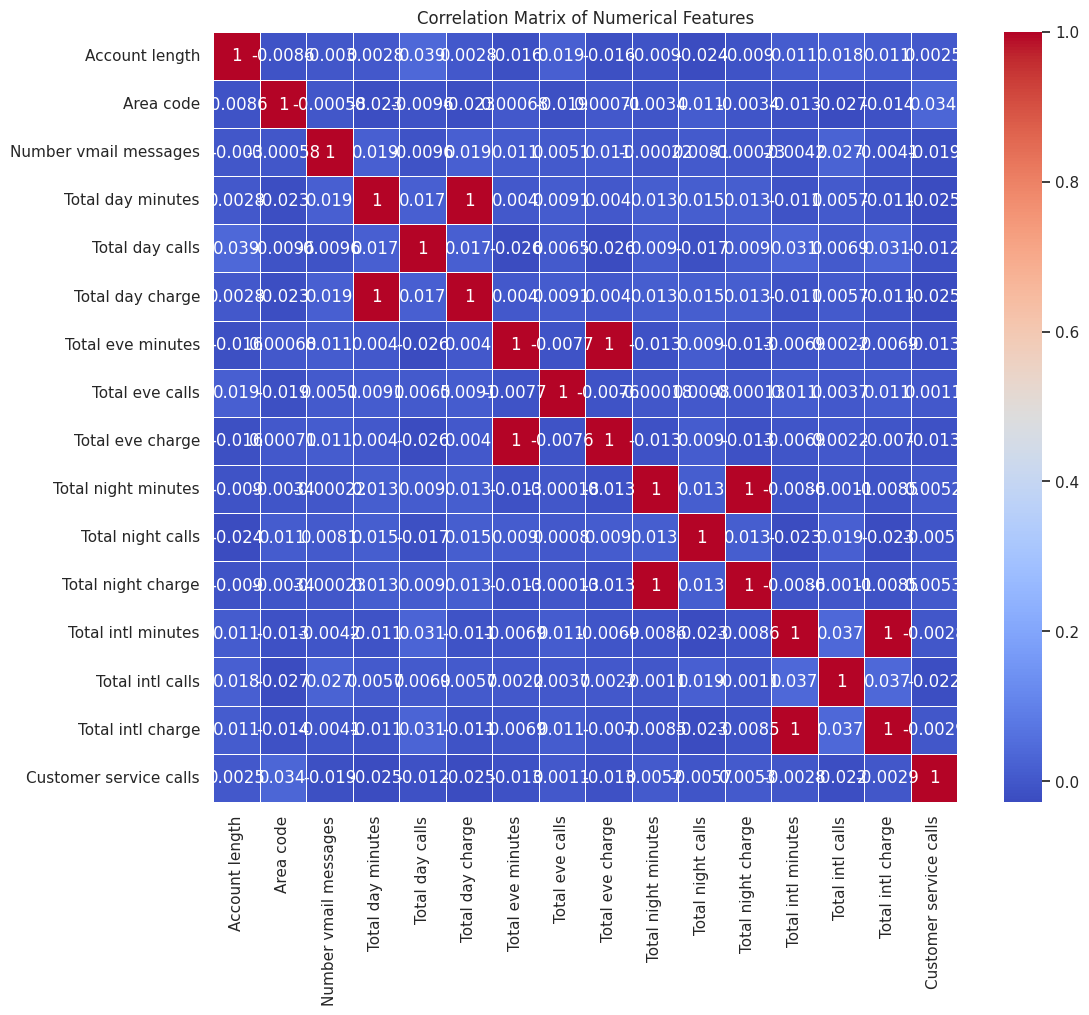

In [ ]:
# 4. Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

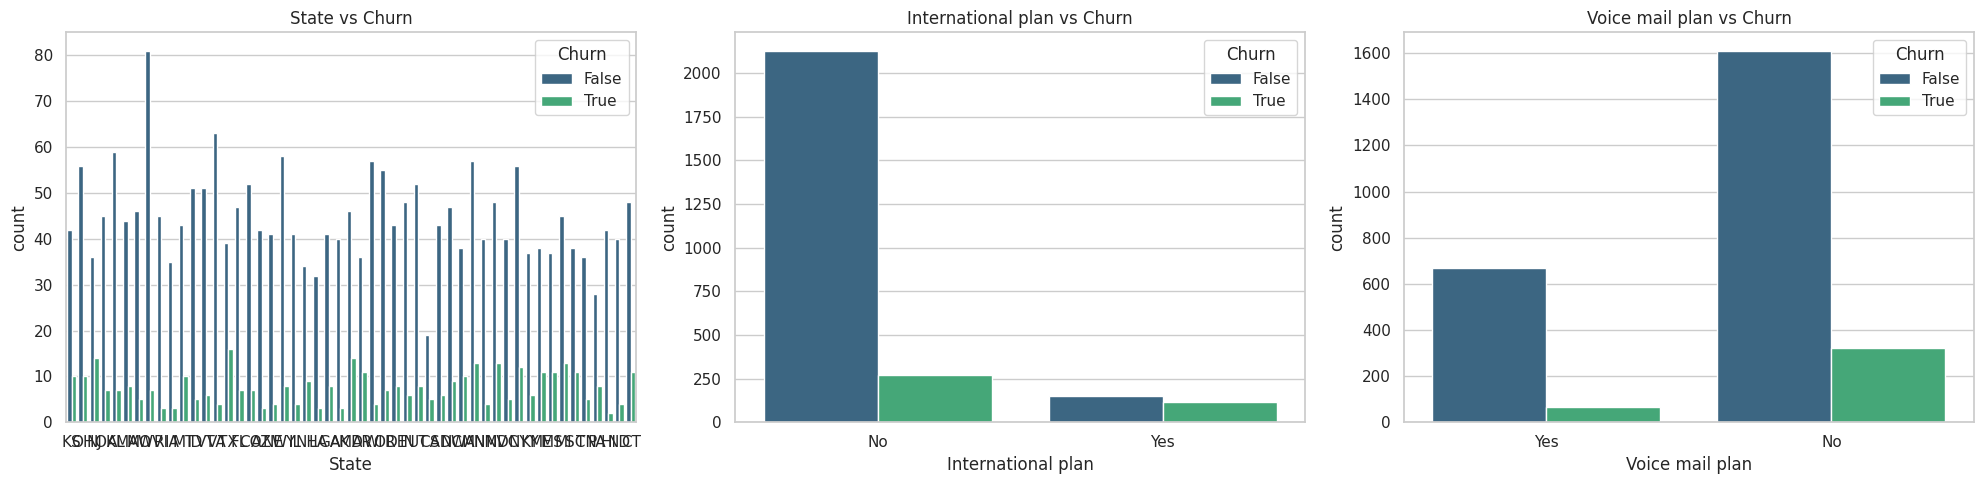

In [ ]:
# 5. Categorical feature analysis
categorical_cols = ['State', 'International plan', 'Voice mail plan']
# Plot the relationship between categorical features and Churn
plt.figure(figsize=(20, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Churn', data=data, palette='viridis')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

#Feature Engineering

seeing the correlation matrix we can notice that there is a need for feature engineering

In [ ]:
# Set a threshold for high correlation
threshold = 0.8

# Identify pairs of highly correlated features
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if (col1 != col2) and (correlation_matrix.loc[col1, col2] > threshold)]

# Display the pairs of highly correlated features
print("Highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated feature pairs:
('Total day minutes', 'Total day charge')
('Total day charge', 'Total day minutes')
('Total eve minutes', 'Total eve charge')
('Total eve charge', 'Total eve minutes')
('Total night minutes', 'Total night charge')
('Total night charge', 'Total night minutes')
('Total intl minutes', 'Total intl charge')
('Total intl charge', 'Total intl minutes')


In [ ]:
# Example: Creating new features by combining highly correlated pairs
for col1, col2 in high_corr_pairs:
    new_feature_name = f'{col1}_{col2}_combined'
    data_encoded[new_feature_name] = data_encoded[col1] + data_encoded[col2]

In [ ]:
# Drop the original highly correlated features
features_to_drop = set([col for col1, col2 in high_corr_pairs for col in [col1, col2]])
df = data_encoded.drop(columns=features_to_drop)

In [ ]:
# Display the updated dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls,Churn,Total day minutes_Total day charge_combined,Total day charge_Total day minutes_combined,Total eve minutes_Total eve charge_combined,Total eve charge_Total eve minutes_combined,Total night minutes_Total night charge_combined,Total night charge_Total night minutes_combined,Total intl minutes_Total intl charge_combined,Total intl charge_Total intl minutes_combined
0,16,128,415,0,1,25,110,99,91,3,1,False,310.17,310.17,214.18,214.18,255.71,255.71,12.70,12.70
1,35,107,415,0,1,26,123,103,103,3,1,False,189.07,189.07,212.12,212.12,265.85,265.85,17.40,17.40
2,31,137,415,0,0,0,114,110,104,5,0,False,284.78,284.78,131.50,131.50,169.92,169.92,15.49,15.49
3,35,84,408,1,0,0,71,88,89,7,2,False,350.30,350.30,67.16,67.16,205.76,205.76,8.38,8.38
4,36,75,415,1,0,0,113,122,121,3,3,False,195.04,195.04,160.91,160.91,195.31,195.31,12.83,12.83


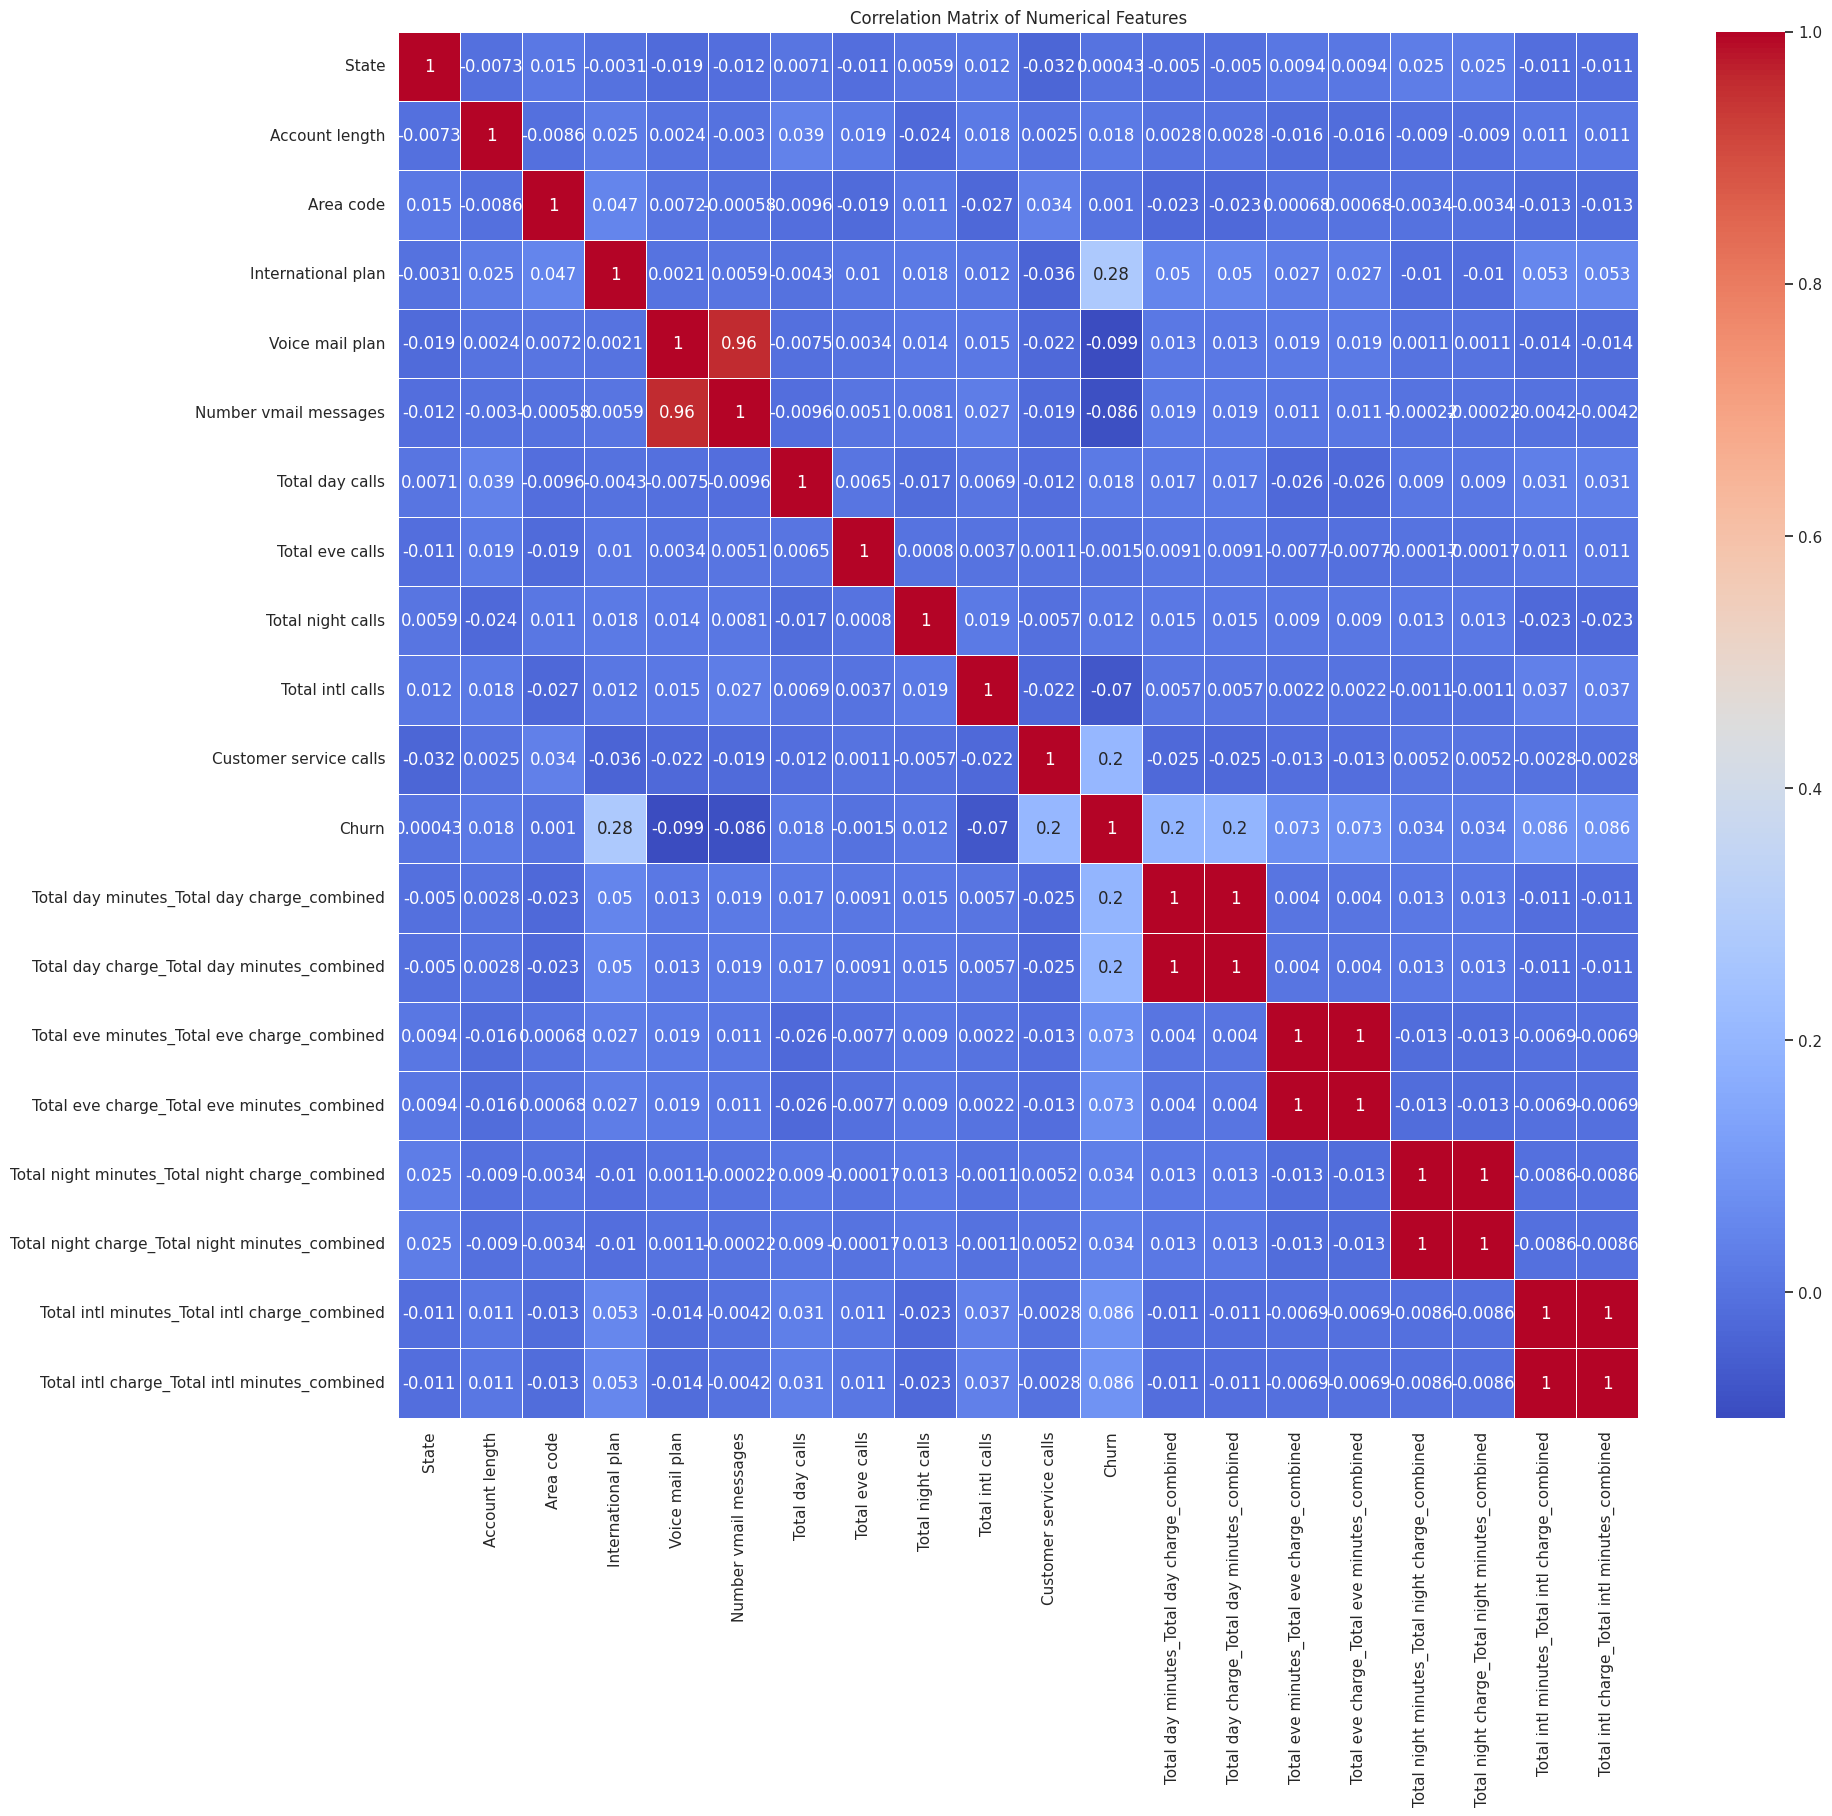

In [ ]:
plt.figure(figsize=(20,18))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

as we see there are still some features with corr = 1 but they are like same as the one before them so we remove these features

In [ ]:
features_to_drop = ['Total day charge_Total day minutes_combined', 'Total eve charge_Total eve minutes_combined', 'Total night charge_Total night minutes_combined','Total intl charge_Total intl minutes_combined']
df = df.drop(columns = features_to_drop)

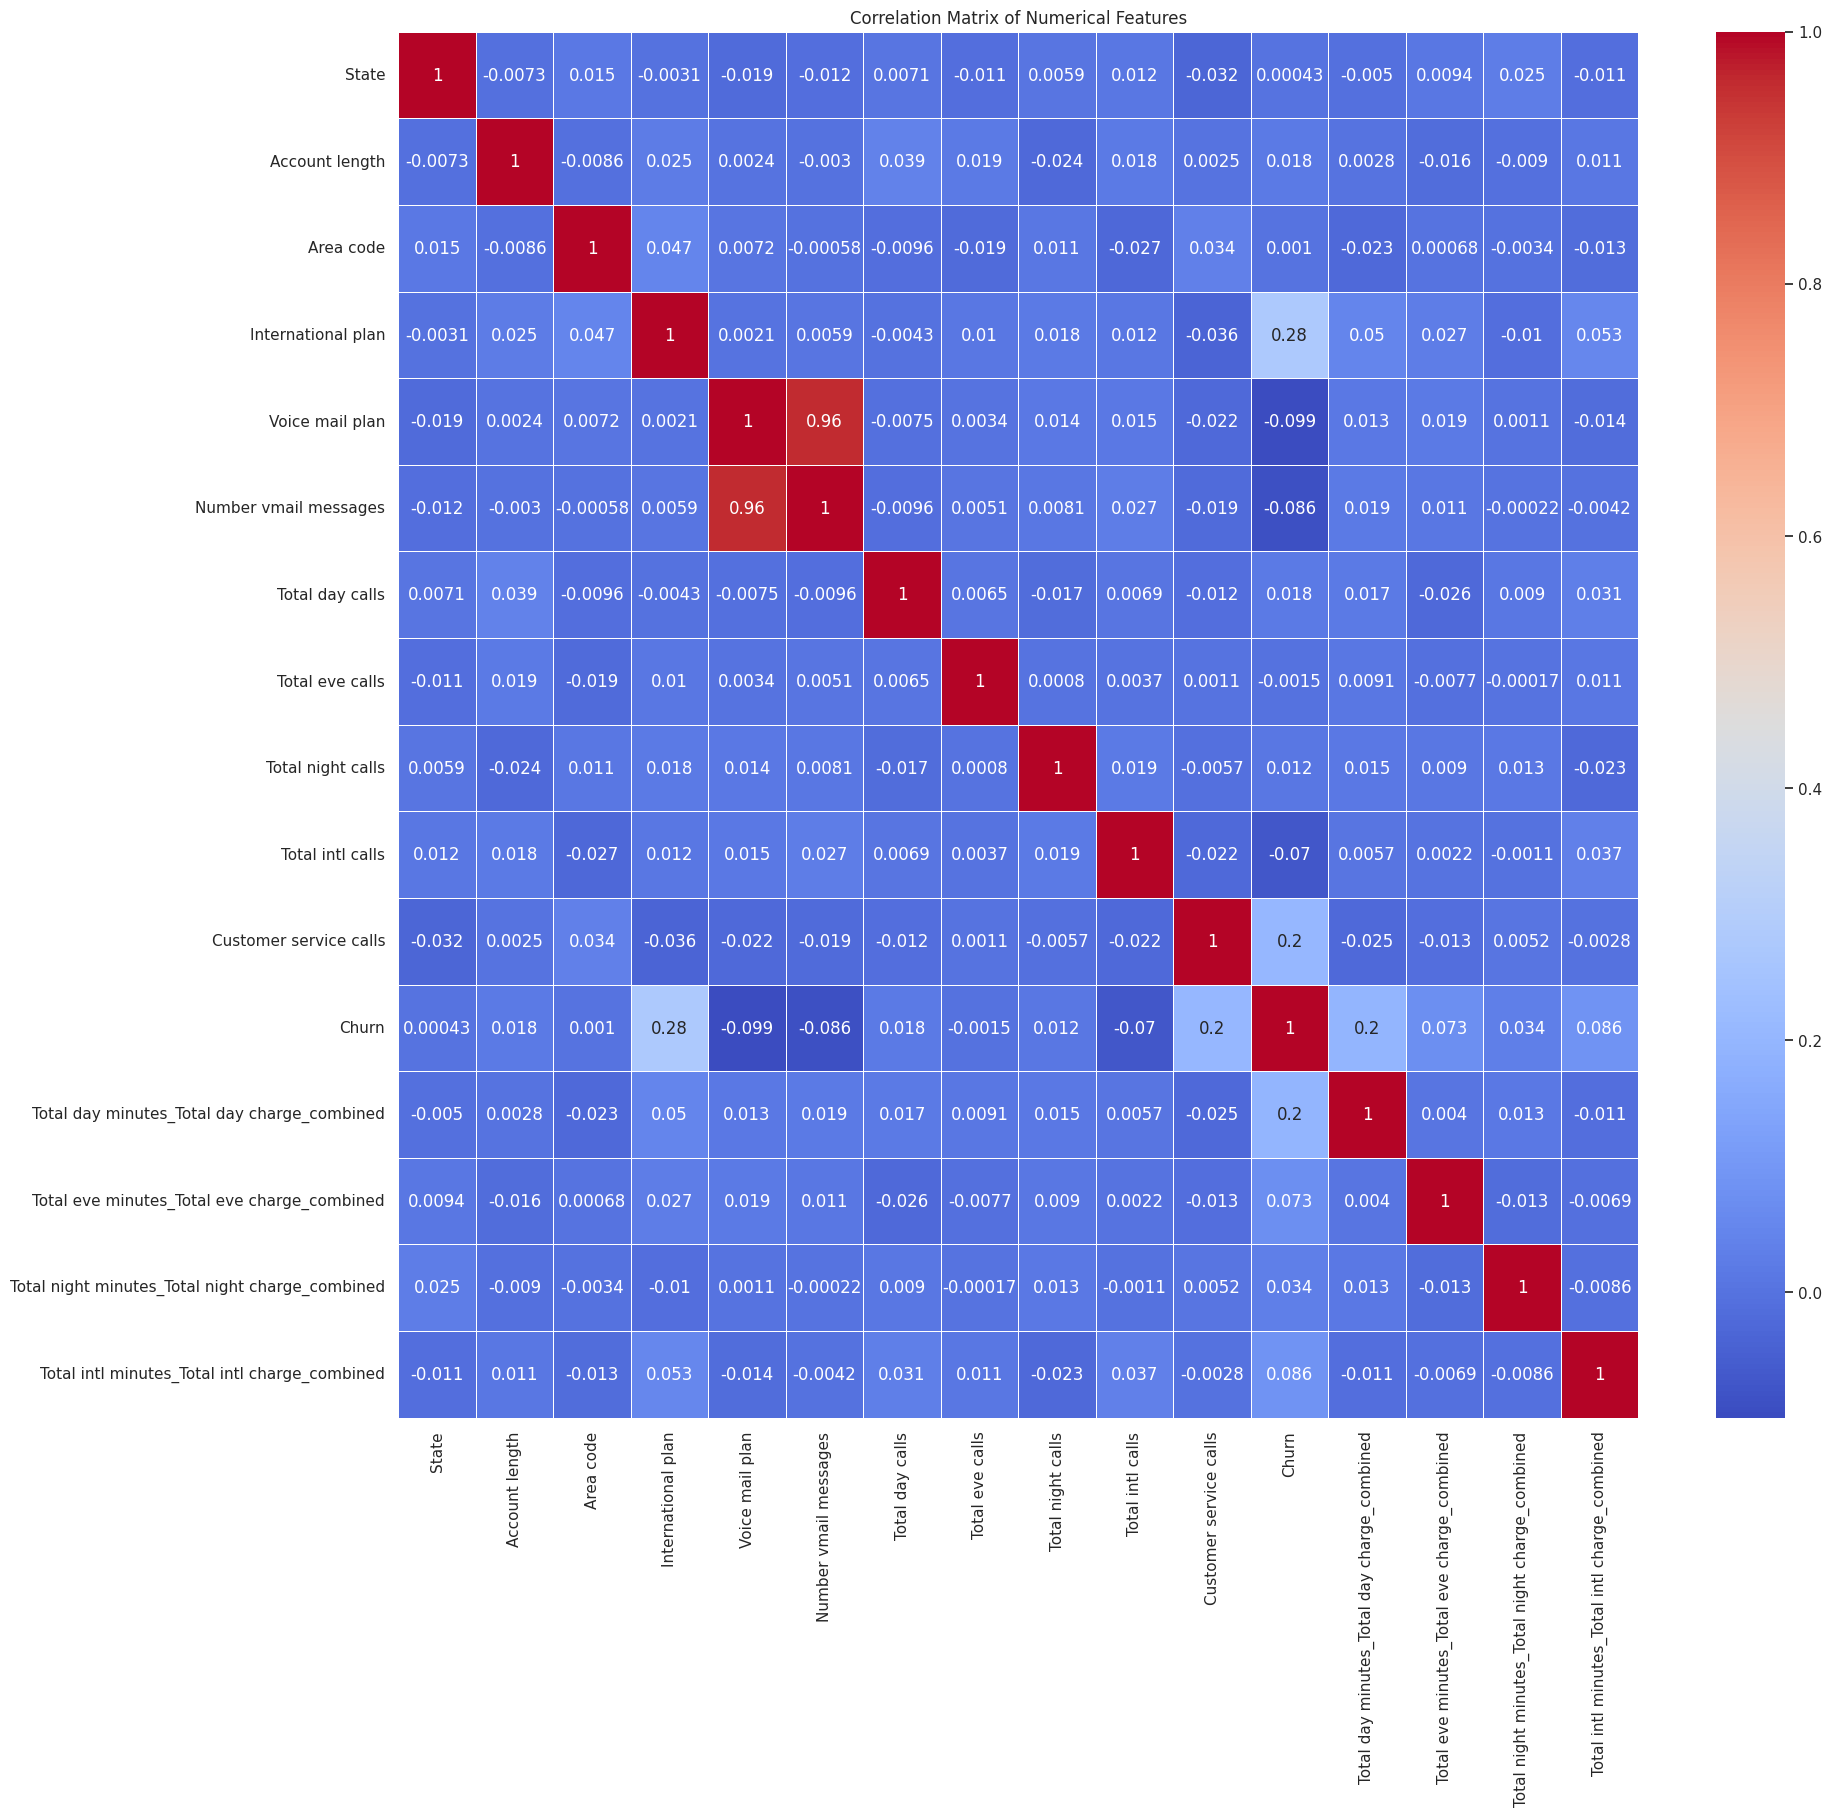

In [ ]:
plt.figure(figsize=(20,18))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

alright now we have a pretty good correlation matrix

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (2132, 15) (2132,)
Test set shape: (534, 15) (534,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Model Evaluation

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, output_dict= True)

# Convert the report to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

Accuracy: 0.94


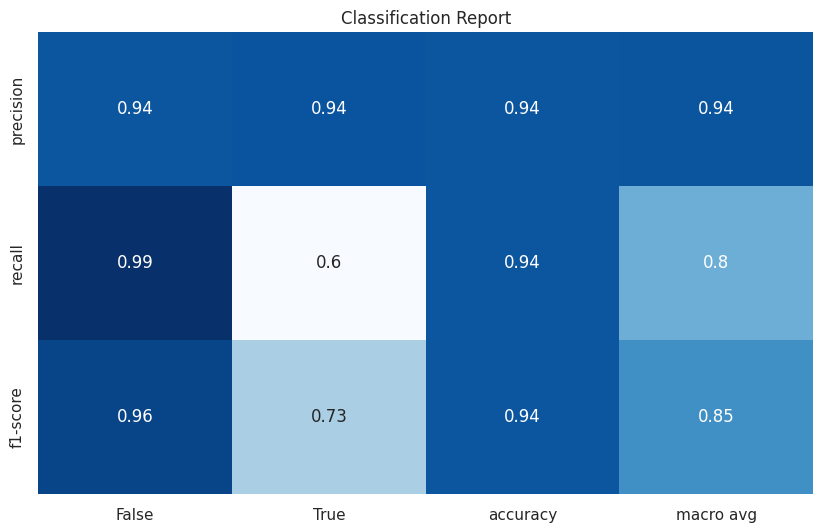

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')
plt.show()

Confusion Matrix:
[[453   3]
 [ 31  47]]


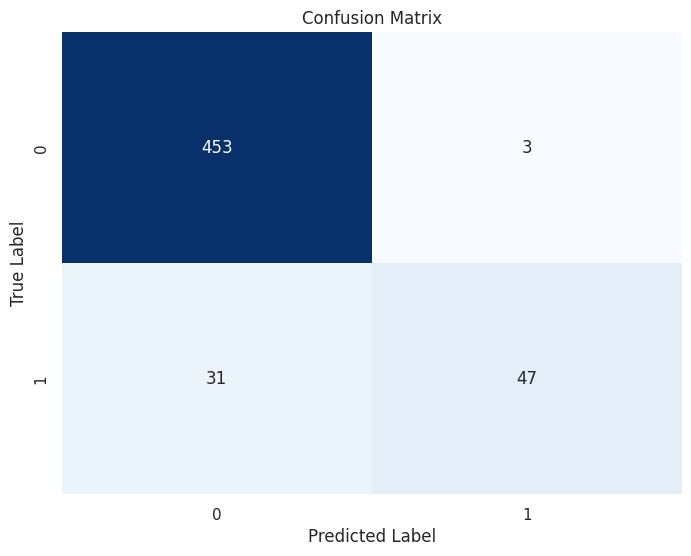

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()